In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_advt=pd.read_csv('Advertising.csv')

In [3]:
df_advt.shape

(200, 4)

In [4]:
df_advt.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df_advt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df_advt.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [7]:
df_advt.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


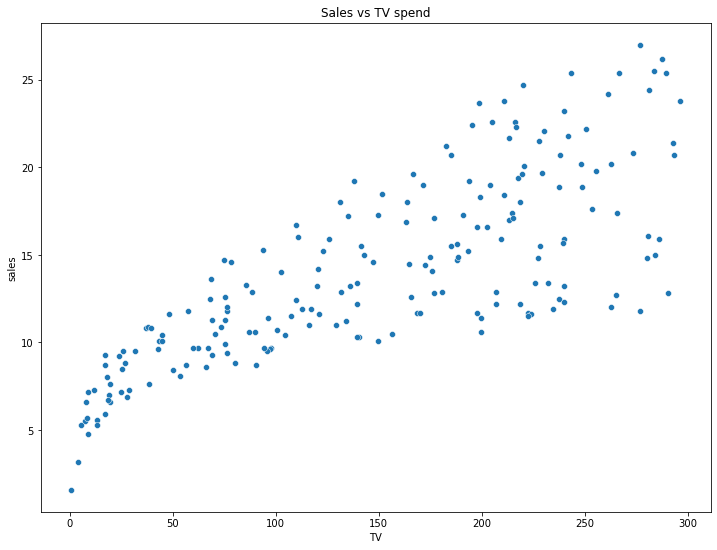

In [5]:
#plot the sales and TV spend
plt.figure(figsize=(12,9))
sns.scatterplot(data=df_advt,x='TV',y='sales')
plt.title('Sales vs TV spend')
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression
st_model=LinearRegression()
st_model.fit(df_advt[['TV']],df_advt[['sales']])

LinearRegression()

In [8]:
st_model.coef_

array([[0.04753664]])

In [9]:
st_model.intercept_

array([7.03259355])

In [17]:
#sales=0.04753664*TV+7.03259355
# If TV spend is 230.1 then
0.04753664*230.1+7.03259355

17.970774413999997

In [10]:
#Error=Actual-predicted
22.1-17.970774413999997

4.129225586000004

In [21]:
y_pred=st_model.predict(df_advt[['TV']])

In [12]:
y_pred[0]

array([17.97077451])

In [15]:
y=df_advt['sales'][0]

In [16]:
y

22.1

In [14]:
y-y_pred[0]

array([4.12922549])

In [18]:
y=df_advt['sales']

In [22]:
from sklearn.metrics import r2_score,mean_squared_error

In [24]:
r2_score(y_pred=y_pred,y_true=y)

0.611875050850071

In [25]:
mean_squared_error(y_pred=y_pred,y_true=y)

10.512652915656757

In [26]:
np.sqrt(mean_squared_error(y_pred=y_pred,y_true=y))

3.2423221486546887

In [27]:
# We are using the statsmodels library for ordinary least square regression
import statsmodels.formula.api as smf

In [37]:
# Statsmodels provides the capability to define the model as a formula - Sales ~ TV
smf_sales_tv_model=smf.ols(formula='sales~TV',data=df_advt).fit()

In [39]:
# Get the statistical values
smf_sales_tv_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 16 Oct 2021   Prob (F-statistic):           1.47e-42
Time:                        20:12:12   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
# Build a new model that includes Radio...We will observe if it gives a better prediction and R-square
smf_sales_tv_rd_model=smf.ols(formula='sales~TV+radio',data=df_advt).fit()

In [36]:
smf_sales_tv_rd_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sat, 16 Oct 2021   Prob (F-statistic):           4.83e-98
Time:                        20:37:25   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
# Since we got better R-square, now we add the third parameter - Newspaper and observe the outcome
smf_sales_tv_rd_np=smf.ols(formula='sales~TV+radio+newspaper',data=df_advt).fit()


In [30]:
smf_sales_tv_rd_np.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 16 Oct 2021   Prob (F-statistic):           1.58e-96
Time:                        20:35:05   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
# Residuals
smf_sales_tv_rd_model.resid

0      1.544535
1     -1.945362
2     -3.037018
3      0.882884
4     -0.323908
         ...   
195    2.235488
196    1.547625
197    0.031952
198    1.707077
199   -1.757543
Length: 200, dtype: float64

In [38]:
# Create an instance of Linear Regression Model
sk_sales_tv_rd_model = LinearRegression()

In [39]:
sk_sales_tv_rd_model.fit(df_advt[['TV','radio']],df_advt[['sales']])

LinearRegression()

In [40]:
sk_sales_tv_rd_model.coef_

array([[0.04575482, 0.18799423]])

In [41]:
sk_sales_tv_rd_model.intercept_

array([2.92109991])

In [44]:
y_pred=sk_sales_tv_rd_model.predict(df_advt[['TV','radio']])

In [46]:
y_pred[0]

array([20.55546463])

In [48]:
y=df_advt['sales']

In [50]:
y[0]

22.1

In [51]:
y[0]-y_pred[0]

array([1.54453537])

In [52]:
# Sales = 0.0475*TV+7.0326 -> R2 = 0.61
# Sales = 0.0458*TV + 0.1880*radio+2.9211 -> R2 = 0.89
# Sales = 0.0458*TV + 0.1880*radio-0.0010*newspaper + 2.9389 R2=0.89

# Now we will build the complete model training process

In [53]:
#Define x and y variables
x=df_advt[['TV','radio','newspaper']]
y=df_advt[['sales']]

In [54]:
x.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [55]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=41)


In [71]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(200, 3)
(140, 3)
(60, 3)


In [72]:
model=LinearRegression()

In [73]:
model.fit(x_train,y_train)

LinearRegression()

In [74]:
y_train_pred=model.predict(x_train)

In [76]:
y_train_pred[0]

array([9.42014195])

In [77]:
r2_score(y_pred=y_train_pred,y_true=y_train)

0.8994475215747493

In [78]:
model.coef_

array([[ 0.04590351,  0.1973617 , -0.00135984]])

In [79]:
model.intercept_

array([2.63831521])

In [81]:
mean_squared_error(y_pred=y_train_pred,y_true=y_train,squared=False)

1.6302461016817862

In [82]:
## Testing model on the Test Set

In [84]:
y_test_predict = model.predict(x_test)

In [86]:
r2_score(y_pred=y_test_predict,y_true=y_test)

0.8879002374422851

In [87]:
mean_squared_error(y_pred=y_test_predict,y_true=y_test,squared=False)

1.7773504815164987